In [1]:
%matplotlib inline
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)
import pandas as pd
import arviz as az


In [6]:
teamMonth = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/teamMonth.csv")
teamMonth['rate'] = teamMonth.SP1W / teamMonth.capacity1W
teamMonth.head()




,Unnamed: 0,SP1W,capacity1W,rate
0,2019-10-01,4.25,21.25,0.200000
1,2019-10-02,4.00,21.25,0.188235
2,2019-10-03,16.00,21.25,0.752941
3,2019-10-04,15.00,21.25,0.705882
4,2019-10-05,15.00,21.25,0.705882


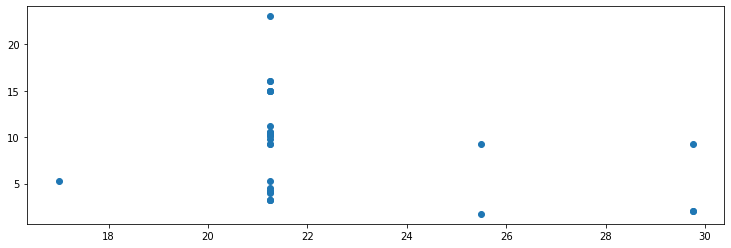

In [43]:
plt.scatter(teamMonth['capacity1W'], teamMonth['SP1W'])

9.0078125
5.157004465819655


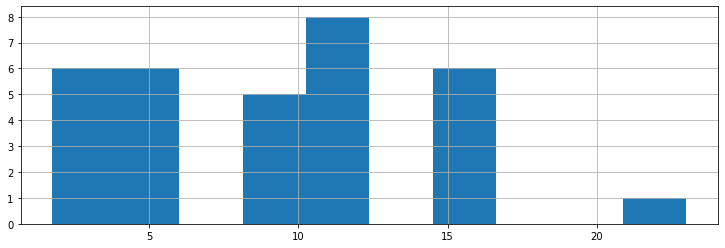

In [10]:
_ = teamMonth['SP1W'].hist()
print(teamMonth.SP1W.mean())
print(teamMonth.SP1W.std())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [eta]
>Metropolis: [sigma_eta]
>Metropolis: [SP_1W]
>Metropolis: [sigma_SP]
>Metropolis: [mu_SP]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:09<00:00, 4452.09draws/s]
The number of effective samples is smaller than 10% for some parameters.


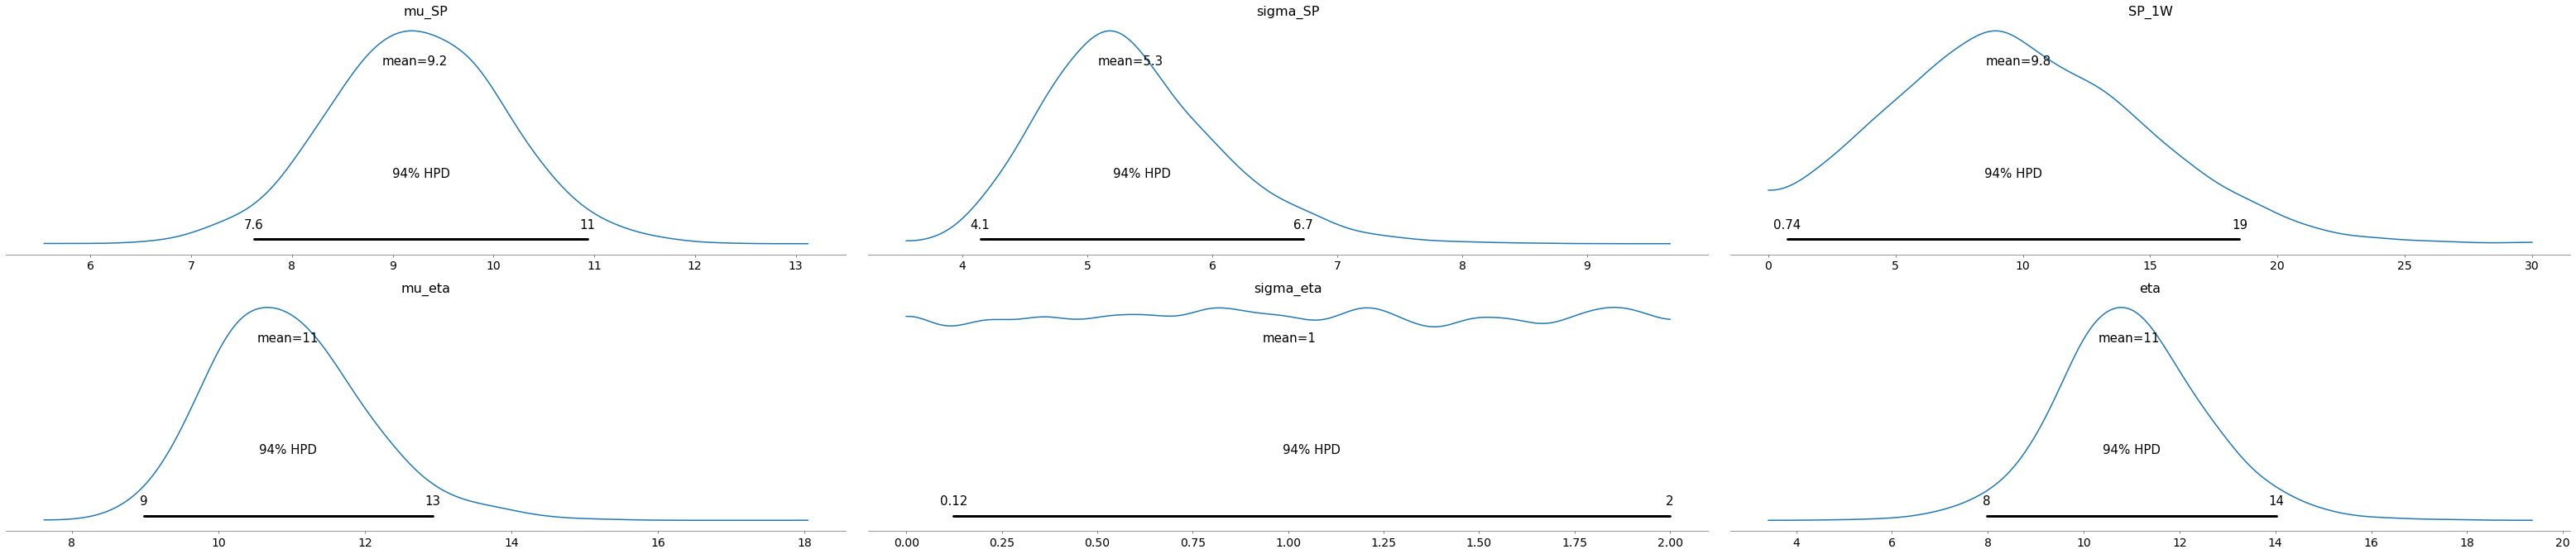

In [101]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:

    mu_SP = pm.Normal("mu_SP", 10, 2)
    sigma_SP = pm.Uniform("sigma_SP", 0, 10)
    
    SP_1W = BoundedNormal("SP_1W", mu_SP, sigma_SP)
    
    mu_eta = pm.Deterministic("mu_eta", 100 / mu_SP)
    #sigma_eta = BoundedNormal("sigma_eta", 0.2, 0.1)
    sigma_eta = pm.Uniform("sigma_eta", 0, 2)
    
    eta = BoundedNormal("eta", mu_eta, sigma_eta)
    
    
    
    BoundedNormal = pm.Bound(pm.Normal, lower=0, upper=30)
    
    
    obs_SP = pm.Normal("obs_SP", mu=mu_SP, sigma = sigma_SP, observed=teamMonth.SP1W)
    


    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step)
    burned_trace=trace[1000:]
    
pm.plot_posterior(burned_trace)
plt.show()

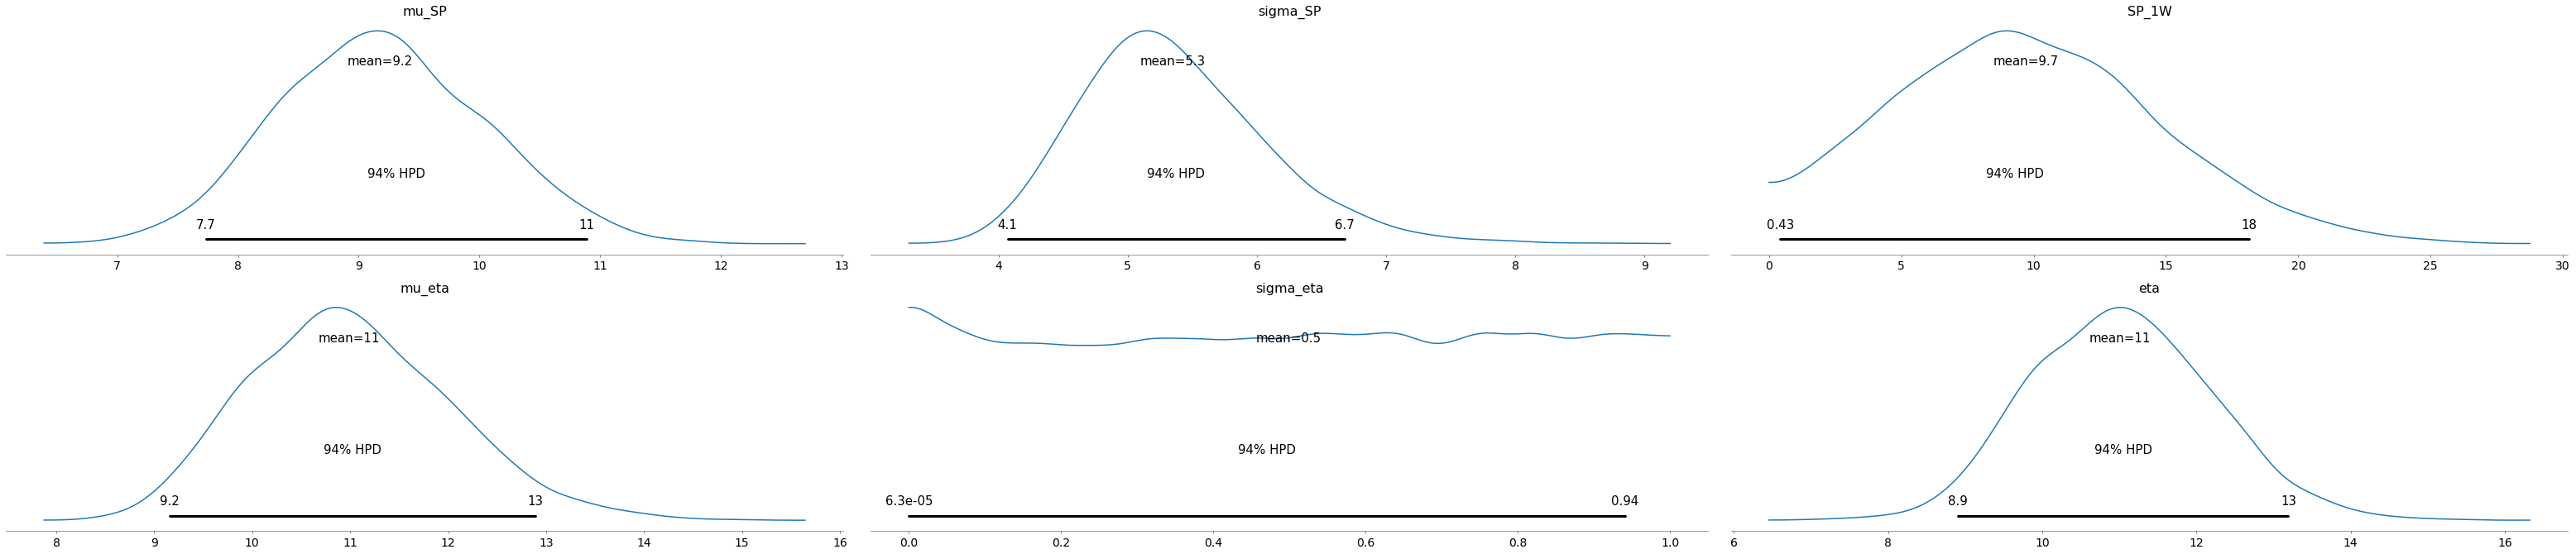

In [78]:
az.summary(burned_trace, credible_interval=.94).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_SP,9.12,0.75,7.57,10.47,0.04,0.03,340.0,340.0,342.0,323.0,1.02
sigma_SP,4.62,0.28,4.13,5.00,0.00,0.00,6508.0,6390.0,5104.0,4614.0,1.00
SP_1W,9.38,4.40,0.46,16.56,0.06,0.04,5320.0,5320.0,4973.0,4693.0,1.00
mu_eta,3.31,0.28,2.81,3.87,0.02,0.01,317.0,307.0,342.0,321.0,1.02
sigma_eta,0.08,0.06,0.00,0.19,0.00,0.00,2908.0,2908.0,2205.0,2227.0,1.00
eta,3.31,0.30,2.74,3.88,0.02,0.01,318.0,306.0,338.0,306.0,1.02


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d6cdd68>],
      dtype=object)

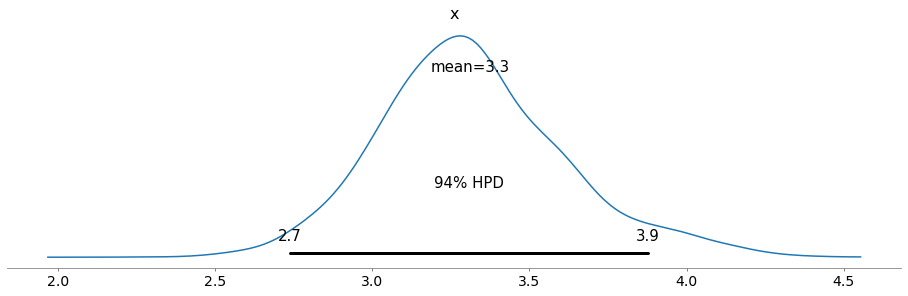

In [79]:
pm.plot_posterior(burned_trace['eta'])

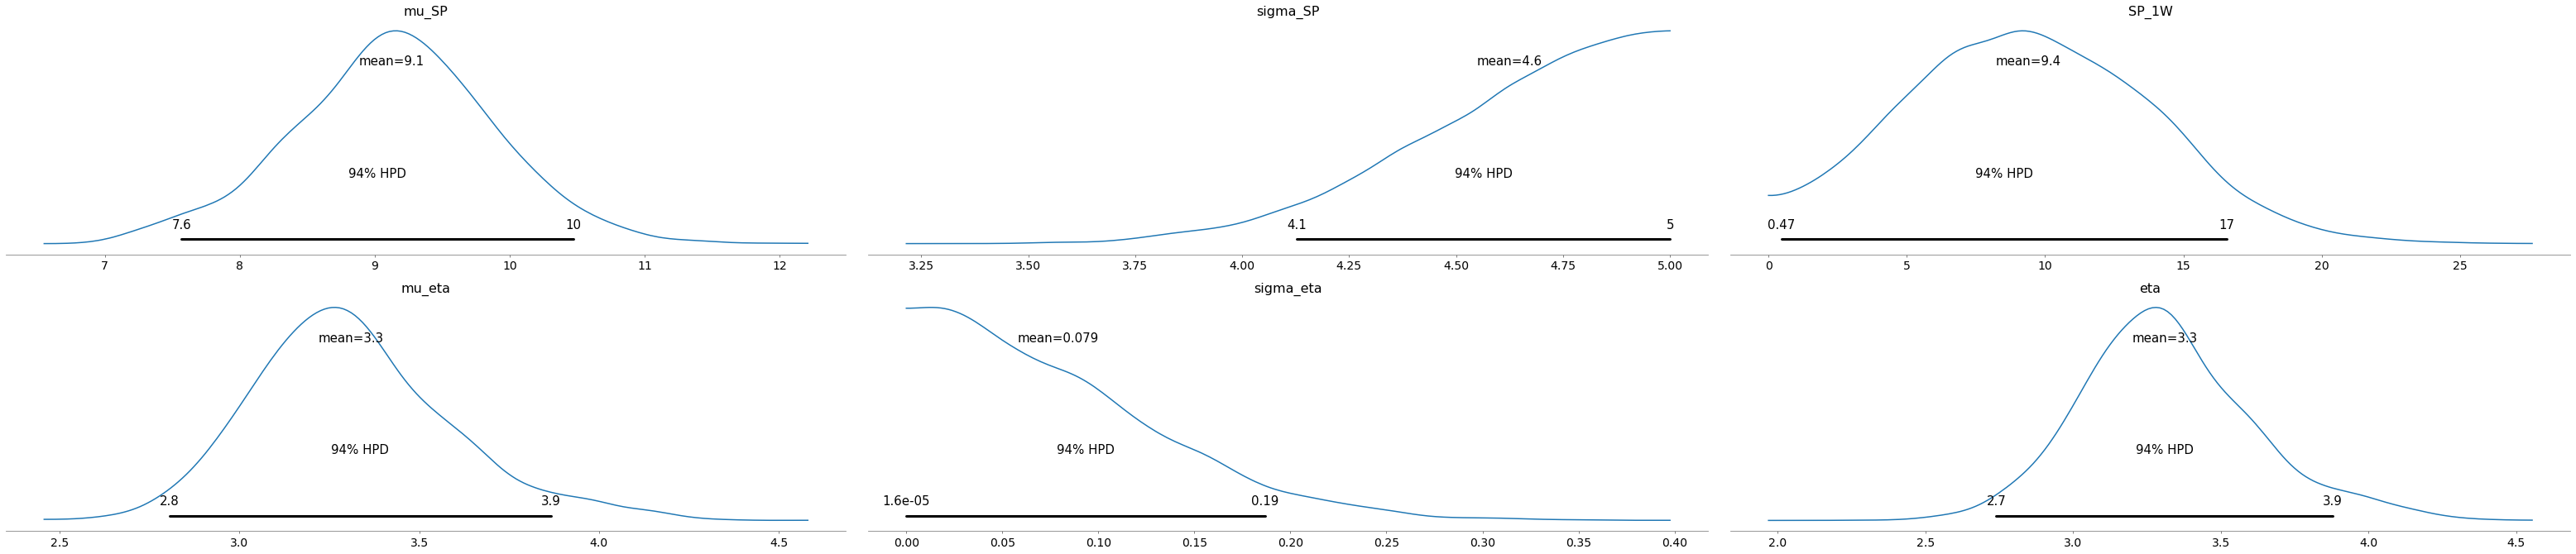

KeyError: 'Unknown variable weeksToFinish'

In [80]:
pm.plot_posterior(burned_trace,)
plt.show()
#pm.plot_posterior(burned_trace['weeksToFinish'], credible_interval=0.95)

In [51]:
print(burned_trace['SP_1W'])
print(burned_trace['SP_1W_2'])

[12.87884988  6.33297699  6.33297699 ... 12.18006001 10.52539777
 10.52539777]
[11.69365288 11.69365288 11.69365288 ... 10.84654562 10.84654562
 10.84654562]
